# Business Understanding

## Project Domain

Proyek ini berada dalam domain e-commerce, analisis pasar otomotif, dan machine learning. Secara spesifik, fokusnya adalah pada prediksi harga jual mobil menggunakan model Artificial Neural Networks (ANN

## Problem Statements

Menentukan harga jual yang akurat untuk mobil bekas di pasar yang kompetitif adalah tugas yang kompleks. Banyak variabel seperti merek, model, tahun, jarak tempuh, kondisi, fitur, dan sentimen pasar memengaruhi harga . Model regresi linier tradisional mungkin tidak selalu menangkap hubungan non-linear yang kompleks antar variabel ini, yang dapat menyebabkan prediksi yang kurang akurat dan potensi masalah underfitting atau overfitting . Hal ini menyulitkan penjual dan pembeli untuk mencapai kesepakatan harga yang optimal.

## Goals

Tujuan utama dari proyek ini adalah:

* Mengembangkan model prediktif berbasis Artificial
* Neural Networks (ANN) untuk memperkirakan harga jual mobil secara akurat.
* Memanfaatkan kemampuan ANN untuk menangkap pola dan hubungan non-linear dalam data yang mungkin tidak terdeteksi oleh model regresi sederhana.
* Meningkatkan akurasi prediksi harga dibandingkan dengan metode regresi tradisional .
* Menyediakan alat yang lebih canggih bagi pelaku pasar otomotif untuk pengambilan keputusan harga.

## Solution Statements

Solusi yang diusulkan adalah membangun model regresi menggunakan Artificial Neural Networks (ANN). Model ini akan dilatih pada dataset yang berisi informasi rinci tentang mobil bekas dan atribut-atributnya. Arsitektur ANN akan dirancang untuk secara efektif memproses berbagai jenis data dan mengidentifikasi pola yang kompleks yang berkontribusi pada penentuan harga. Setelah dilatih dan divalidasi, model ANN akan digunakan untuk memprediksi harga jual mobil baru berdasarkan karakteristiknya.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmalikibrahim","key":"fca488e13f470fb10cee691f70690f16"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d yashpaloswal/ann-car-sales-price-prediction

Dataset URL: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction
License(s): DbCL-1.0
  0% 0.00/29.0k [00:00<?, ?B/s]
100% 29.0k/29.0k [00:00<00:00, 108MB/s]


In [ ]:
!mkdir ann-car-sales-price-prediction
!unzip ann-car-sales-price-prediction.zip -d ann-car-sales-price-prediction
!ls ann-car-sales-price-prediction

Archive:  ann-car-sales-price-prediction.zip
  inflating: ann-car-sales-price-prediction/car_purchasing.csv  
car_purchasing.csv


## Import Library yang dibutuhkan

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [52]:
df = pd.read_csv('ann-car-sales-price-prediction/car_purchasing.csv', encoding='latin-1')

In [ ]:
df_cleaned = df.drop(['customer name', 'customer e-mail'], axis=1)

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['country'], drop_first=True)


In [ ]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


## Data Preparation

In [ ]:
X = df_encoded.drop('car purchase amount', axis=1)
y = df_encoded['car purchase amount']

In [ ]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [53]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

In [54]:
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 26517850.0000 - mae: 3940.0208 - val_loss: 53644612.0000 - val_mae: 5778.5273
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24331884.0000 - mae: 3871.8115 - val_loss: 53242828.0000 - val_mae: 5758.6289
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27548760.0000 - mae: 4024.0652 - val_loss: 53151068.0000 - val_mae: 5749.1758
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24550298.0000 - mae: 3758.2446 - val_loss: 53047328.0000 - val_mae: 5739.7720
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23926416.0000 - mae: 3751.2034 - val_loss: 52552280.0000 - val_mae: 5714.8169
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24219830.0000 - mae: 3805.7959 - val_loss: 51925144.0000 - val_mae: 5682.0220
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25068314.0000 - mae: 3836.3308 - val_loss: 52049992.0000 - val_mae: 5682.2017
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [57]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2219088640.0000 - mae: 45920.2344 
Akurasi Model: 45264.6250
Loss Model: 2156859648.0000


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,909 (421.52 KB)

 Trainable params: 35,969 (140.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,940 (281.02 KB)

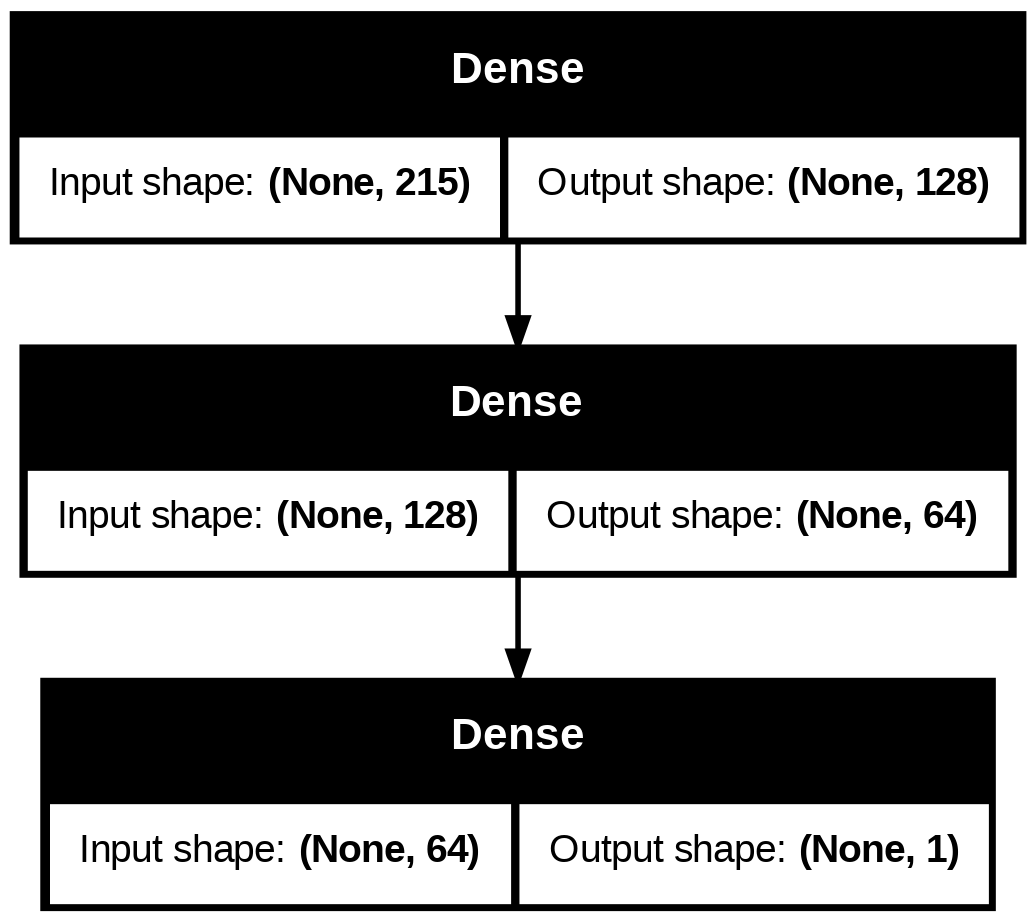

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

# Evaluation

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1128805376.0000 - mean_absolute_error: 32076.7871 
Test Loss: 1086605952.0, Test MAE: 31448.75


In [ ]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


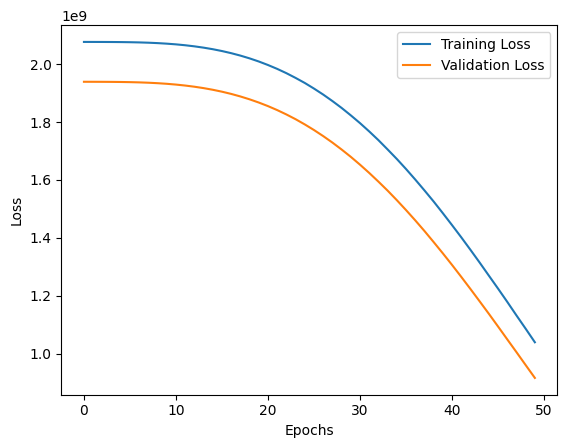

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

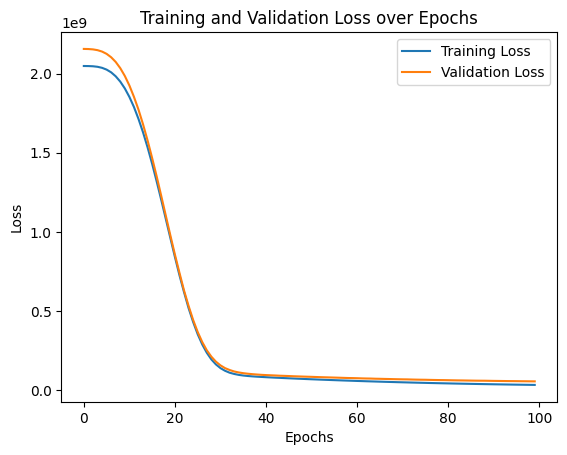

In [59]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Deployment

## Model Simulation

## Save Model